This notebook will use the proportion of content words to show
differences between genres. To do this, we will use the function
proportion_content_words defined in the lyrics_analysis.evaluation
module.

First, let's define a generator that will retrieve song lyrics and
genre from a file.

In [ ]:
import ijson

def retrieve_lyrics_and_genre(file):
    with open(file) as f:
        songs = ijson.items(f, 'item')
        for song in songs:
            yield song["lyrics"], song["genre"]
            

The dataset contains the genres rap, pop, rock, r&b and country. It is
possible that not all will be present in a randomly selected subset.

Define a dictionary that will store lists of metrics calculated
for songs of each genre.

In [2]:
content_words_by_genre = {
    "rap": [],
    "pop": [],
    "rock": [],
    "r-b": [],
    "country": []
}

Now, calculate the proportion of content words for all songs from
the set of 10,000 songs.

In [3]:
import lyrics_analysis.evaluation

for lyrics, genre in retrieve_lyrics_and_genre("../data/cleaned/eval_set_10000_lyrics.json"):
    score = lyrics_analysis.evaluation.proportion_content_words(lyrics)
    content_words_by_genre[genre].append(score)
    

Let's look at the average score for each genre.

In [4]:
for genre, scores in content_words_by_genre.items():
    print(genre, sum(scores) / len(scores))
    

rap 0.5403462426299994
pop 0.5203578457722984
rock 0.5196528536315541
r-b 0.5296739261591198
country 0.5240168829581048


To get a better understanding of how data is distributed, we will use
matplotlib to plot a histogram for each genre.


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'n')

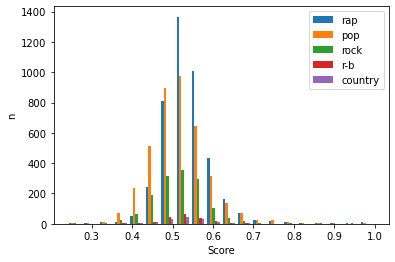

In [9]:
n_bins = 20
genres = ["rap", "pop", "rock", "r-b", "country"]
data = [content_words_by_genre[genre] for genre in genres]
plt.hist(data, bins=n_bins)
plt.legend(genres)
plt.xlabel("Score")
plt.ylabel("n")


We can see that the differences between individual genres are not very
large.